In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#row = record 
#column = attribute/dimention
#target = prediction
cell_df = pd.read_csv('cell_samples.csv')

In [3]:
cell_df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
cell_df.shape

(699, 11)

In [6]:
cell_df.size

7689

In [7]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [8]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

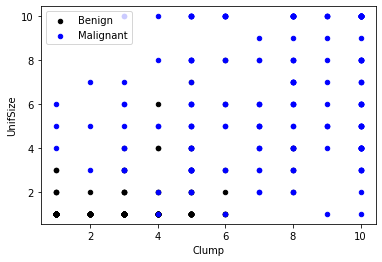

In [22]:
#malignant_value = 4
#benign_value = 
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes= benign_df.plot(kind = 'scatter', x= 'Clump', y = 'UnifSize', color='black', label='Benign')
malignant_df.plot(kind = 'scatter', x= 'Clump', y = 'UnifSize', color='blue', label='Malignant', ax = axes)
# help(benign_df.plot)

In [23]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [25]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [27]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [30]:
feature_df = cell_df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#independent Variable
X= np.asarray(feature_df)

#dependent Variable
y = np.asarray(cell_df['Class'])

#X[0:5]
#y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [43]:
#dividing data into trainning and test part

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#_train.shape
#_test.shape
#_train.shape
#_test.shape


In [46]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear' , gamma = 'auto', C= 2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

